# Saving your results in MPQP

This notebook demonstrates how to manage quantum circuit execution results using
the `mpqp` library.

You can basically skip the first cell which sets up the database so that is does
not interfere with any of your previous work. In case you are interested in this
topic, you can dive deeper using the documentation of the corresponding section.

In [1]:
from mpqp import QCircuit
from mpqp.execution import run, IBMDevice, GOOGLEDevice, Result, BatchResult, JobType
from mpqp.execution.connection.env_manager import get_env_variable, save_env_variable
from mpqp.gates import *
from mpqp.measures import *


# Backing up your local storage to avoid losing any of your data
from mpqp.local_storage import setup_local_storage, clear_local_storage

old_db_path = get_env_variable("DB_PATH")
setup_local_storage("example_db_for_notebook.db")
clear_local_storage()

After execution of a circuit, you might want to save your result for later use.
Here is how you would do it:

We create a simple quantum circuit using gates and run it on a simulator.
We can then store the results in the local storage.

By default if a job already exists the result will put the same job_id it can be change by setup `compile_same_job` args in `insert_result` to `false`.

In [2]:
c = QCircuit([H(0), CNOT(0, 1), BasisMeasure()])

result = run(c, device=IBMDevice.AER_SIMULATOR)

id = result.save()
print(id)

1


At a latter date, when you need this result, you can retrieve it by it's `id` as such:

In [3]:
result = Result.load_by_local_id(1)
print(result)

Result: IBMDevice, AER_SIMULATOR
 Counts: [518, 0, 0, 506]
 Probabilities: [0.50586, 0, 0, 0.49414]
 Samples:
  State: 00, Index: 0, Count: 518, Probability: 0.5058594
  State: 11, Index: 3, Count: 506, Probability: 0.4941406
 Error: None


Of course this can also be done with a batch result:

1


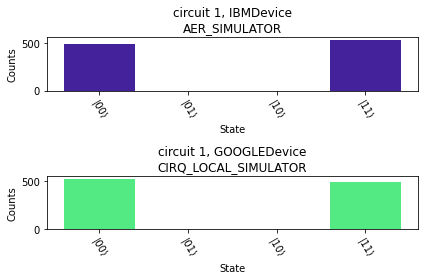

In [4]:
run(c, device=[IBMDevice.AER_SIMULATOR, GOOGLEDevice.CIRQ_LOCAL_SIMULATOR]).save()
print(id)
...
BatchResult.load_by_local_ids([2,3]).plot()

One might also not have saved the `id`s, you can then load all the results, or
load results similar to one you know should be close to the one you're looking for:

In [5]:
print("All results:")
for r in Result.load_all(): print(r)

r = Result.load_all()[0]
print("\nOr results similar to a specific result:")
print(r.load_similar())

All results:
Result: IBMDevice, AER_SIMULATOR
 Counts: [518, 0, 0, 506]
 Probabilities: [0.50586, 0, 0, 0.49414]
 Samples:
  State: 00, Index: 0, Count: 518, Probability: 0.5058594
  State: 11, Index: 3, Count: 506, Probability: 0.4941406
 Error: None
Result: circuit 1, IBMDevice, AER_SIMULATOR
 Counts: [493, 0, 0, 531]
 Probabilities: [0.48145, 0, 0, 0.51855]
 Samples:
  State: 00, Index: 0, Count: 493, Probability: 0.4814453
  State: 11, Index: 3, Count: 531, Probability: 0.5185547
 Error: None
Result: circuit 1, GOOGLEDevice, CIRQ_LOCAL_SIMULATOR
 Counts: [528, 0, 0, 496]
 Probabilities: [0.51562, 0, 0, 0.48438]
 Samples:
  State: 00, Index: 0, Count: 528, Probability: 0.515625
  State: 11, Index: 3, Count: 496, Probability: 0.484375
 Error: None

Or results similar to a specific result:
[Result(Job(JobType.SAMPLE, QCircuit([H(0), CNOT(0, 1), BasisMeasure()]), IBMDevice.AER_SIMULATOR, BasisMeasure([0, 1], c_targets=[0, 1])), [Sample(2, index=0, count=518, probability=0.505859375), S

But of course you can still filter by custom filter:

In [6]:
sample_results = [r for r in Result.load_all() if r.job.job_type == JobType.SAMPLE]
for r in sample_results: print(r)

Result: IBMDevice, AER_SIMULATOR
 Counts: [518, 0, 0, 506]
 Probabilities: [0.50586, 0, 0, 0.49414]
 Samples:
  State: 00, Index: 0, Count: 518, Probability: 0.5058594
  State: 11, Index: 3, Count: 506, Probability: 0.4941406
 Error: None
Result: circuit 1, IBMDevice, AER_SIMULATOR
 Counts: [493, 0, 0, 531]
 Probabilities: [0.48145, 0, 0, 0.51855]
 Samples:
  State: 00, Index: 0, Count: 493, Probability: 0.4814453
  State: 11, Index: 3, Count: 531, Probability: 0.5185547
 Error: None
Result: circuit 1, GOOGLEDevice, CIRQ_LOCAL_SIMULATOR
 Counts: [528, 0, 0, 496]
 Probabilities: [0.51562, 0, 0, 0.48438]
 Samples:
  State: 00, Index: 0, Count: 528, Probability: 0.515625
  State: 11, Index: 3, Count: 496, Probability: 0.484375
 Error: None


Results can also be deleted once you no longer them:

In [7]:
Result.delete_by_local_id(1)

All of these methods have an equivalent for jobs, where you can save, load et
delete your jobs.

Now that you know how to use your result local storage, let us revert it to it's
previous state.  

In [8]:
clear_local_storage()
save_env_variable("DB_PATH", old_db_path)

True